## 层次聚类Hierarchical Clustering
1. 自底向上（聚合聚类）
从每个点作为一个簇开始，逐步合并最近的簇，直到达到终止条件。
代表算法模型：
AgglomerativeClustering（Scikit-learn 提供）
支持不同的链接方法（ward、complete、average、single）。
使用欧几里得距离或其他自定义距离度量。

2. 自顶向下（分裂聚类）
从所有点作为一个簇开始，逐步分裂为多个簇，直到满足停止条件。
代表算法模型：
Scikit-learn 没有直接实现此类算法，但可以通过递归分裂来实现。

3. 特点与变种
基于密度的层次聚类：
HDBSCAN（pyclustering 提供）：结合层次聚类和密度聚类。
基于图的层次聚类：
可以结合 SpectralClustering 实现层次划分。

## 自底而上（聚合聚类）Agglomerative Clustering

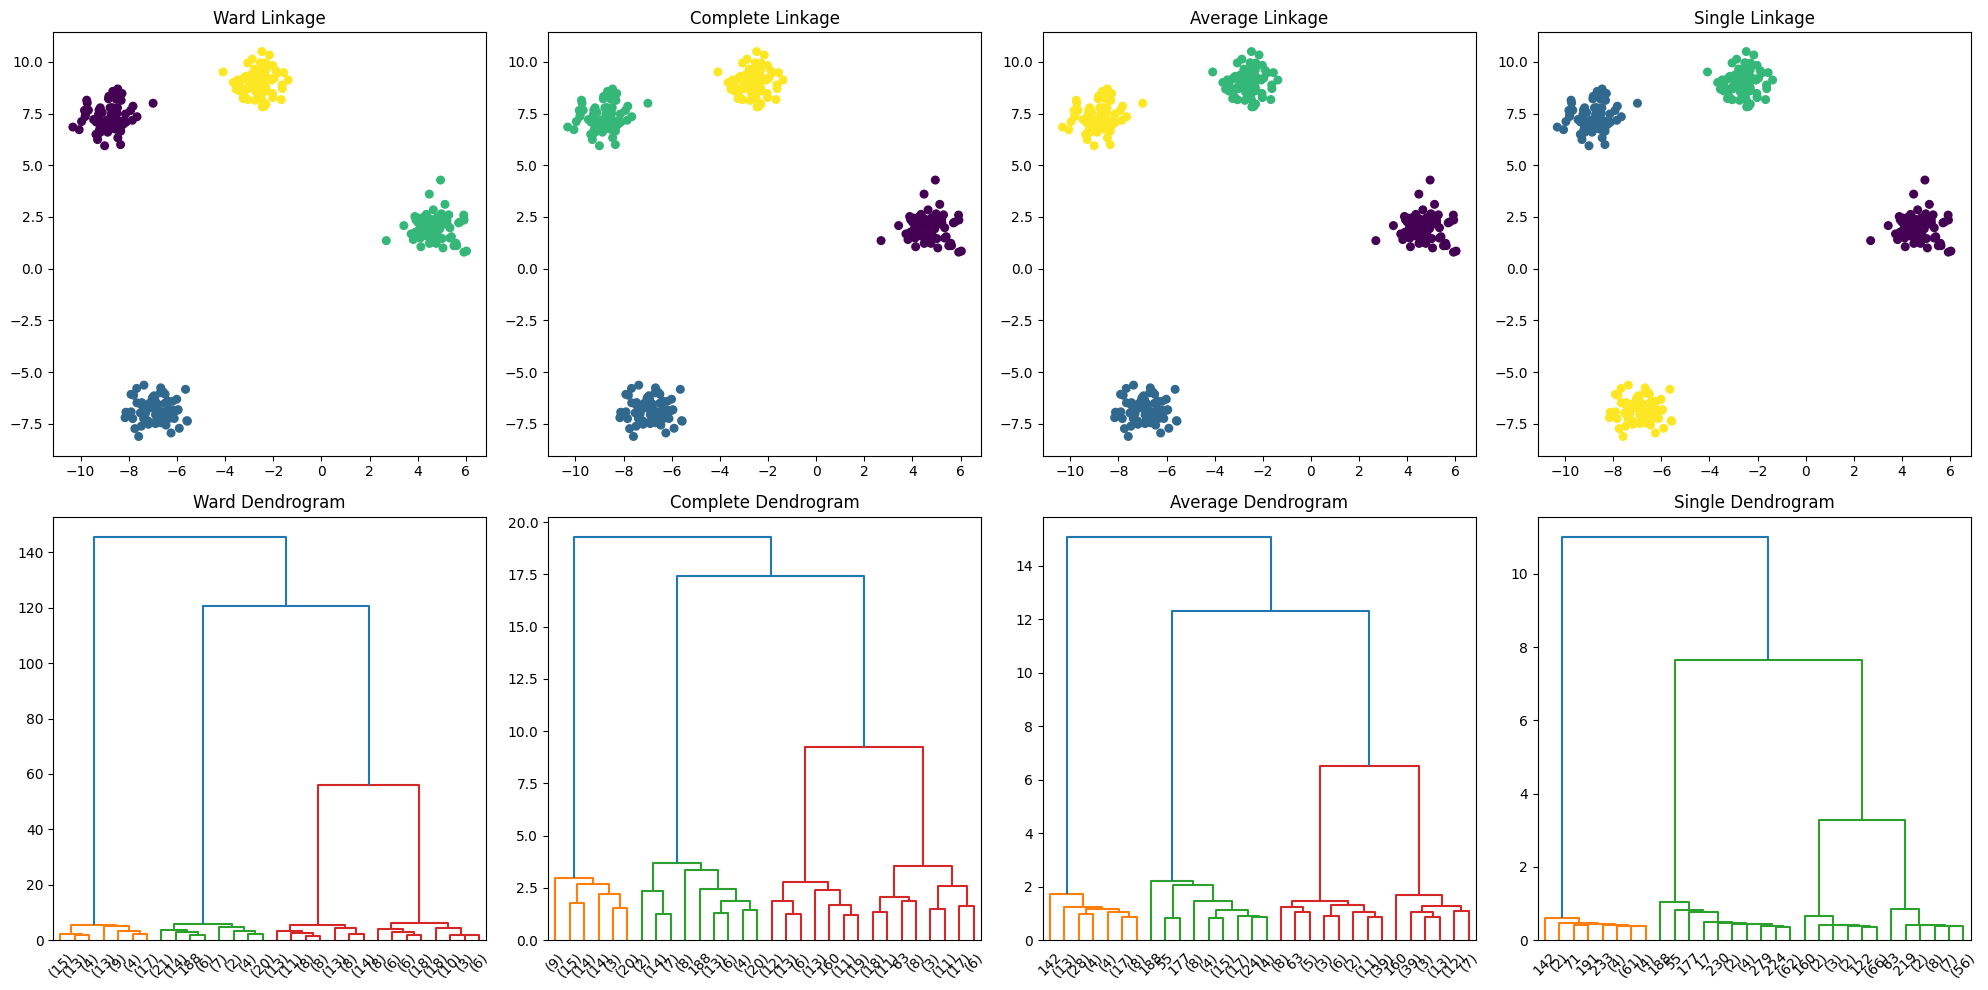

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Agglomerative Clustering with different linkage methods
linkage_methods = ["ward", "complete", "average", "single"]
models = {method: AgglomerativeClustering(n_clusters=4, linkage=method) for method in linkage_methods}

# Plot results of Agglomerative Clustering and Dendrograms
fig, axes = plt.subplots(2, len(models), figsize=(20, 10))

for i, (method, model) in enumerate(models.items()):
    # Fit and predict clusters
    y_pred = model.fit_predict(X)

    # Scatter plot for clustering result
    axes[0, i].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30)
    axes[0, i].set_title(f"{method.capitalize()} Linkage")

    # Dendrogram for hierarchical clustering
    linked = linkage(X, method=method)
    dendrogram(linked, truncate_mode="lastp", p=30, ax=axes[1, i], color_threshold=None)
    axes[1, i].set_title(f"{method.capitalize()} Dendrogram")

plt.tight_layout()
plt.show()


## 自顶而下（分裂聚类）

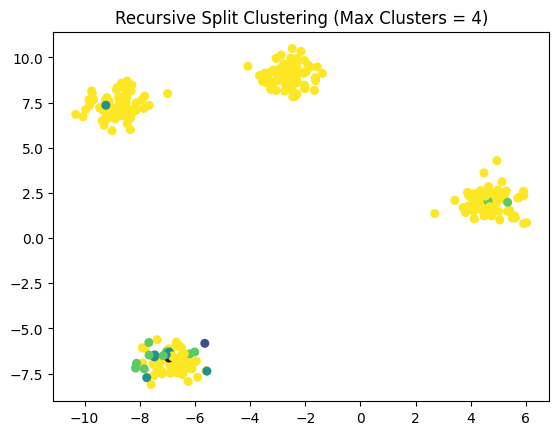

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Recursive splitting function
def recursive_split(X, max_clusters, current_cluster=1, labels=None):
    if labels is None:
        labels = np.zeros(X.shape[0], dtype=int)
    
    # Stop splitting if max_clusters is reached
    if current_cluster > max_clusters:
        return labels
    
    # Perform K-Means with 2 clusters
    kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
    cluster_labels = kmeans.labels_
    
    # Update global labels
    labels[cluster_labels == 1] = current_cluster
    labels[cluster_labels == 0] = current_cluster + 1
    
    # Recursively split each new cluster
    for cluster_id in np.unique(labels):
        cluster_points = X[labels == cluster_id]
        if len(cluster_points) > 1:
            labels[labels == cluster_id] = recursive_split(
                cluster_points, max_clusters, cluster_id, labels[labels == cluster_id]
            )
    
    return labels

# Perform recursive splitting
max_clusters = 4
labels = recursive_split(X, max_clusters)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.title(f"Recursive Split Clustering (Max Clusters = {max_clusters})")
plt.show()


## 层次聚类变体

d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


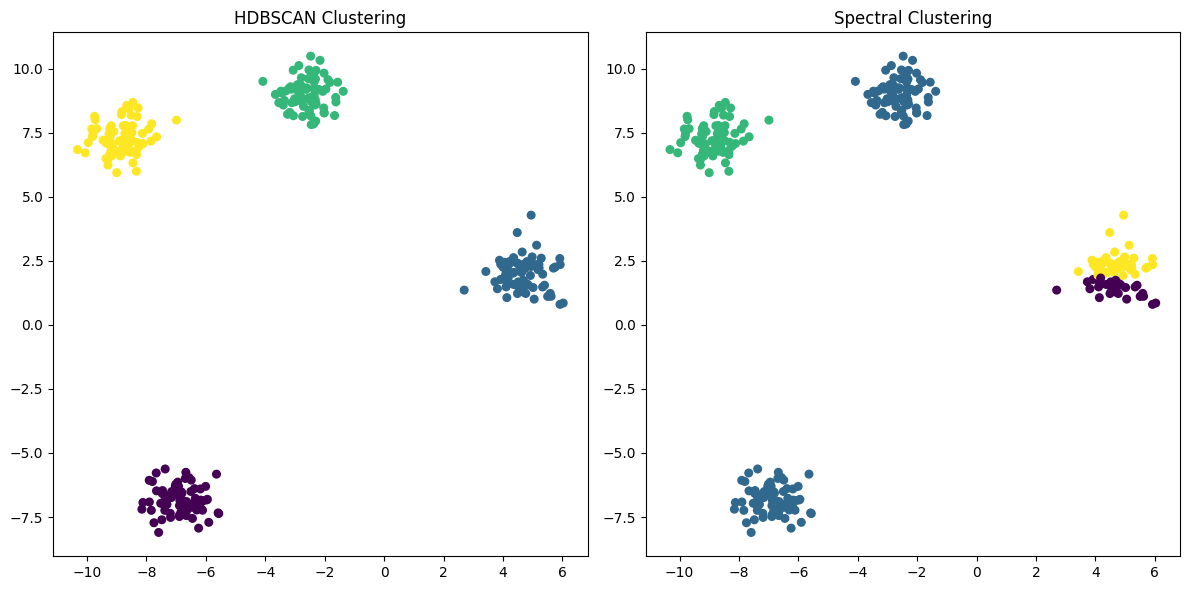

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from hdbscan import HDBSCAN
from sklearn.cluster import SpectralClustering

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# HDBSCAN (Hierarchical Density-Based Spatial Clustering)
hdbscan_model = HDBSCAN(min_cluster_size=10, min_samples=5)

# Spectral Clustering (used for hierarchical-like graph-based clustering)
spectral_model = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)

# Plot results of HDBSCAN and Spectral Clustering
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# HDBSCAN clustering results
hdbscan_labels = hdbscan_model.fit_predict(X)
axes[0].scatter(X[:, 0], X[:, 1], c=hdbscan_labels, cmap='viridis', s=30)
axes[0].set_title("HDBSCAN Clustering")

# Spectral Clustering results
spectral_labels = spectral_model.fit_predict(X)
axes[1].scatter(X[:, 0], X[:, 1], c=spectral_labels, cmap='viridis', s=30)
axes[1].set_title("Spectral Clustering")

plt.tight_layout()
plt.show()

以下是层次聚类方法的总结，包括自底向上、自顶向下及其变种（HDBSCAN、SpectralClustering）：

---

### **1. 自底向上（聚合聚类）**
- **代表算法模型**：`AgglomerativeClustering`
- **特点**：
  - 每个数据点初始为一个簇，逐步合并最近的簇，最终形成一个簇或达到指定簇数。
  - 支持多种链接方法：
    - **Ward**：最小化簇内平方和，适合等方差的球形簇。
    - **Complete**：最小化簇间最大距离，适合非球形簇。
    - **Average**：最小化簇间平均距离，适合中等复杂形状的簇。
    - **Single**：最小化簇间最小距离，易受噪声影响。
- **适用场景**：
  - 数据规模适中（因为算法复杂度较高）。
  - 需要理解数据的层次关系时，使用树状图（Dendrogram）表示。
- **优点**：
  - 直观，层次树结构便于分析簇的嵌套关系。
  - 不需要提前指定簇数（通过 Dendrogram 观察）。
- **缺点**：
  - 计算复杂度高，适合中小规模数据。
  - 对噪声和离群值敏感。

---

### **2. 自顶向下（分裂聚类）**
- **代表算法模型**：无直接实现，可结合递归方法实现。
- **特点**：
  - 从所有点作为一个簇开始，递归分裂为多个子簇。
  - 分裂方式通常基于 K-Means 或其他聚类方法。
- **适用场景**：
  - 数据分布明显，适合明确分裂策略的场景。
  - 对数据层次关系有需求，但无法从底部逐层聚合。
- **优点**：
  - 更适合复杂数据的全局分裂。
  - 可结合其他聚类算法灵活实现。
- **缺点**：
  - 需要手动指定分裂策略和停止条件。
  - 递归实现可能导致较高的计算复杂度。

---

### **3. 特点与变种**
#### **基于密度的层次聚类：HDBSCAN**
- **代表算法模型**：`HDBSCAN`
- **特点**：
  - 结合密度聚类和层次聚类，通过密度阈值控制簇的形成。
  - 能识别噪声点。
- **适用场景**：
  - 数据分布不规则，包含噪声或离群点。
  - 需要更鲁棒的层次聚类方法。
- **优点**：
  - 能处理噪声和离群点。
  - 支持复杂形状的簇。
- **缺点**：
  - 参数较多（如 `min_cluster_size` 和 `min_samples`），需要调试。
  - 对大规模数据性能可能受限。

#### **基于图的层次聚类：SpectralClustering**
- **代表算法模型**：`SpectralClustering`
- **特点**：
  - 基于图论，通过拉普拉斯矩阵分割图实现聚类。
  - 适合非线性数据分布。
- **适用场景**：
  - 数据分布复杂，存在非线性结构。
  - 需要对数据的全局关系进行分析。
- **优点**：
  - 能处理复杂的非线性簇结构。
  - 不依赖欧几里得距离。
- **缺点**：
  - 对参数（如邻域大小）敏感。
  - 内存开销较大，不适合特别大规模数据。

---

### **对比总结**

| **方法**                 | **特点**                                       | **适用场景**                            | **优点**                               | **缺点**                               |
|--------------------------|----------------------------------------------|-----------------------------------------|----------------------------------------|----------------------------------------|
| **AgglomerativeClustering** | 自底向上，逐层合并簇                        | 中小规模数据，需理解层次关系             | 易理解，直观可视化                      | 计算复杂度高，对噪声敏感                |
| **自顶向下聚类**          | 从整体递归分裂簇                            | 明确分裂策略的数据                      | 灵活，适合全局分裂                     | 无直接实现，复杂度高                    |
| **HDBSCAN**              | 基于密度和层次的混合聚类                    | 数据分布不规则，有噪声或离群点           | 鲁棒性强，支持复杂形状簇               | 参数敏感，大规模数据性能受限            |
| **SpectralClustering**   | 基于图的非线性层次聚类                      | 数据分布复杂，需捕捉全局非线性结构       | 非线性簇支持强，适合复杂结构            | 参数敏感，内存开销大                    |

